In [2]:
import pandas as pd
analystRatings=pd.read_csv("/content/raw_analyst_ratings.csv", on_bad_lines='skip')
analystRatings.head()
# meta=pd.read_csv("/content/META_historical_data.csv")
# meta.head()



,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
analystRatings.shape

(1407328, 6)

In [4]:
analystRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [5]:
analystRatings['headline_length'] = analystRatings['headline'].apply(len)
basic_stats = analystRatings['headline_length'].describe()

basic_stats

,headline_length
count,1.407328e+06
mean,7.312051e+01
std,4.073531e+01
min,3.000000e+00
25%,4.700000e+01
50%,6.400000e+01
75%,8.700000e+01
max,5.120000e+02


In [7]:
grouped_by_publisher=analystRatings.groupby('publisher').size().sort_values(ascending=False)
grouped_by_publisher
#Paul Quintaro is most active



,0
publisher,
Paul Quintaro,228373
Lisa Levin,186979
Benzinga Newsdesk,150484
Charles Gross,96732
Monica Gerson,82380
...,...
White Diamond Research,1
Michael Zanger,1
Stock Market Newz,1


In [9]:
analystRatings["publication_date"]=pd.to_datetime(analystRatings["date"],errors='coerce')


In [10]:
analystRatings["month"]=analystRatings["publication_date"].dt.month
analystRatings['day'] =analystRatings["publication_date"].dt.day
analystRatings['weekly']=analystRatings["publication_date"].dt.day_name()
analystRatings.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,publication_date,month,day,weekly
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020-06-05 10:30:54-04:00,6.0,5.0,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020-06-03 10:45:20-04:00,6.0,3.0,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020-05-26 04:30:07-04:00,5.0,26.0,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020-05-22 12:45:06-04:00,5.0,22.0,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020-05-22 11:38:59-04:00,5.0,22.0,Friday


In [11]:
daily_counts = analystRatings.groupby('publication_date').size().reset_index(name='article_count')
daily_counts



,publication_date,article_count
0,2011-04-27 21:01:48-04:00,1
1,2011-04-28 13:49:29-04:00,1
2,2011-04-28 15:00:36-04:00,1
3,2011-04-29 13:47:06-04:00,1
4,2011-04-29 16:11:05-04:00,1
...,...,...
36006,2020-06-11 16:49:41-04:00,1
36007,2020-06-11 16:51:33-04:00,1
36008,2020-06-11 17:01:39-04:00,1
36009,2020-06-11 17:11:20-04:00,1


<Axes: title={'center': 'over all Publication Trends'}, xlabel='publication_date'>

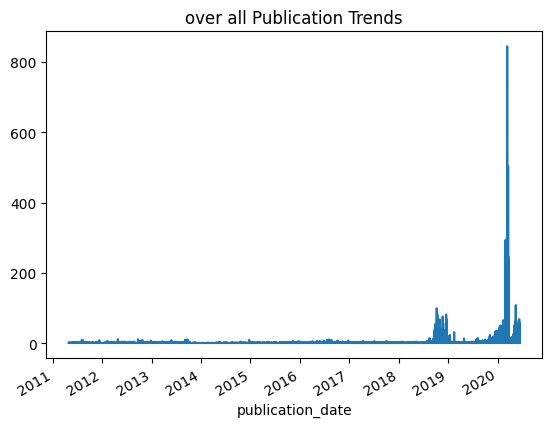

In [12]:
over_all_counts = analystRatings.groupby('publication_date').size()
over_all_counts.plot(title='over all Publication Trends')


In [14]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)
analystRatings['cleaned_headline'] = analystRatings['headline'].apply(preprocess_text)
analystRatings.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,publication_date,month,day,weekly,cleaned_headline
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020-06-05 10:30:54-04:00,6.0,5.0,Friday,stocks hit highs friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020-06-03 10:45:20-04:00,6.0,3.0,Wednesday,stocks hit highs wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020-05-26 04:30:07-04:00,5.0,26.0,Tuesday,71 biggest movers friday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020-05-22 12:45:06-04:00,5.0,22.0,Friday,46 stocks moving friday session
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020-05-22 11:38:59-04:00,5.0,22.0,Friday,b securities maintains neutral agilent technol...


In [ ]:
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(analystRatings['cleaned_headline'])

In [ ]:
#lets make sentiment analysis on the headline column
from textblob import TextBlob

def sentiment_analysis(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'
analystRatings['sentiment']=analystRatings['headline'].apply(sentiment_analysis)
analystRatings.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,Neutral


In [ ]:
#how many of rows got a negative, positive or neurtral sentiment
positive='Positive'
negative='Negative'
neutral='Neutral'

analystRatings['sentiment'].str.contains(negative).sum()


438267

In [ ]:
#total neutral sentiment
analystRatings['sentiment'].str.contains(neutral).sum()



291604

In [ ]:
#total negative sentiment
analystRatings['sentiment'].str.contains(negative).sum()

39331

In [ ]:
#number of positive sentiment
analystRatings['sentiment'].str.contains(positive).sum()

107332

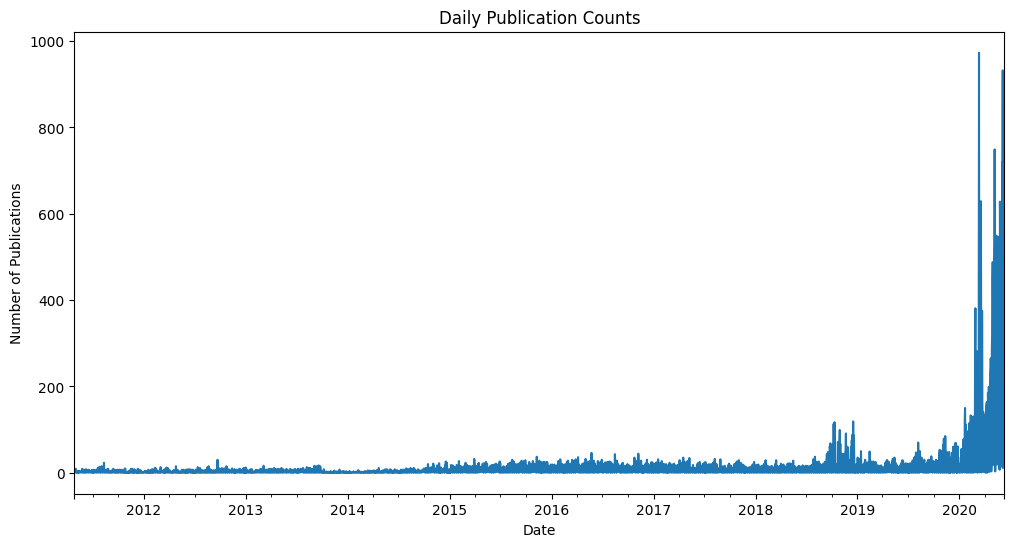

In [16]:
daily_counts = analystRatings.resample('D', on='publication_date').size()
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Publication Counts')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.show()

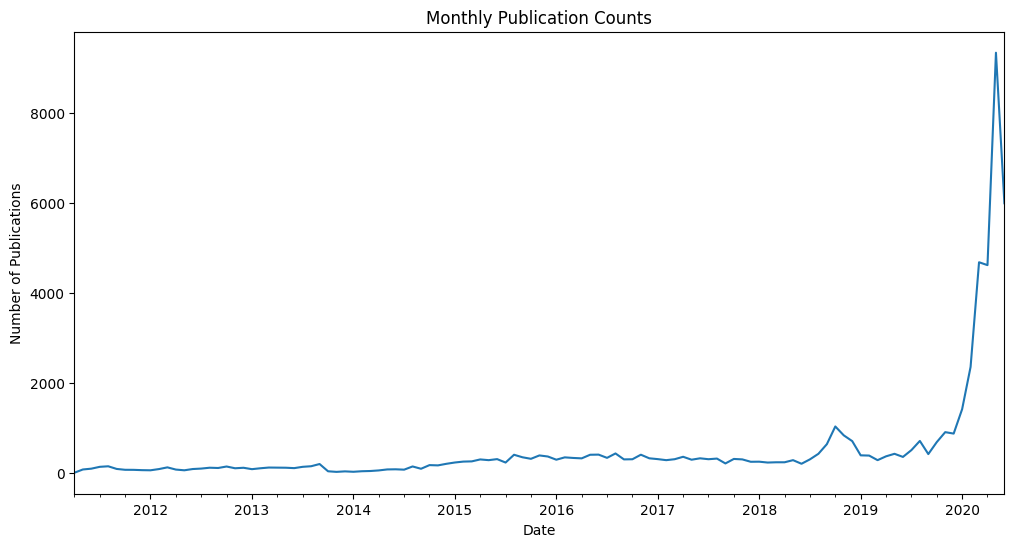

In [17]:
monthly_counts = analystRatings.resample('M', on='publication_date').size()

plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.title('Monthly Publication Counts')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.show()

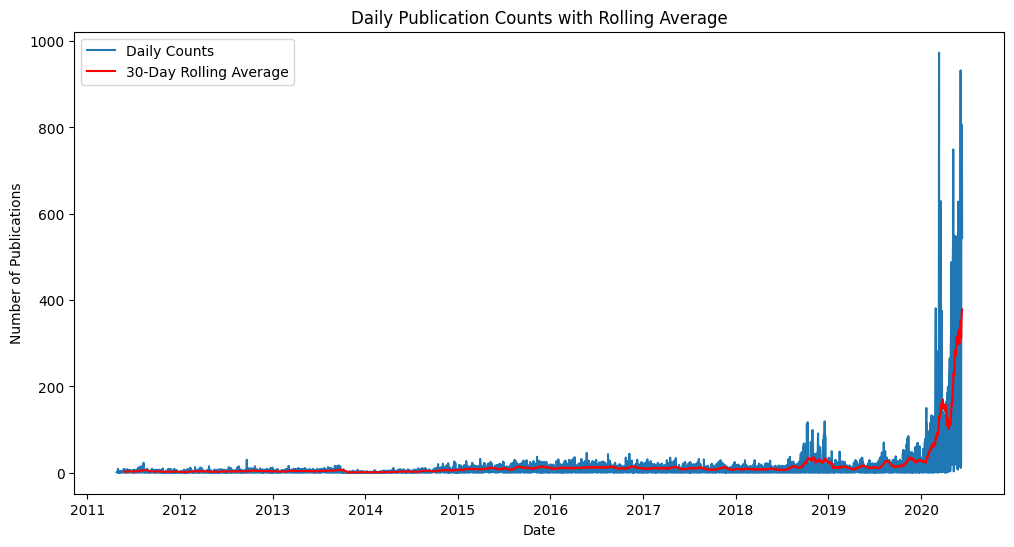

In [18]:
rolling_window = daily_counts.rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_counts, label='Daily Counts')
plt.plot(rolling_window, label='30-Day Rolling Average', color='red')
plt.title('Daily Publication Counts with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.legend()
plt.show()

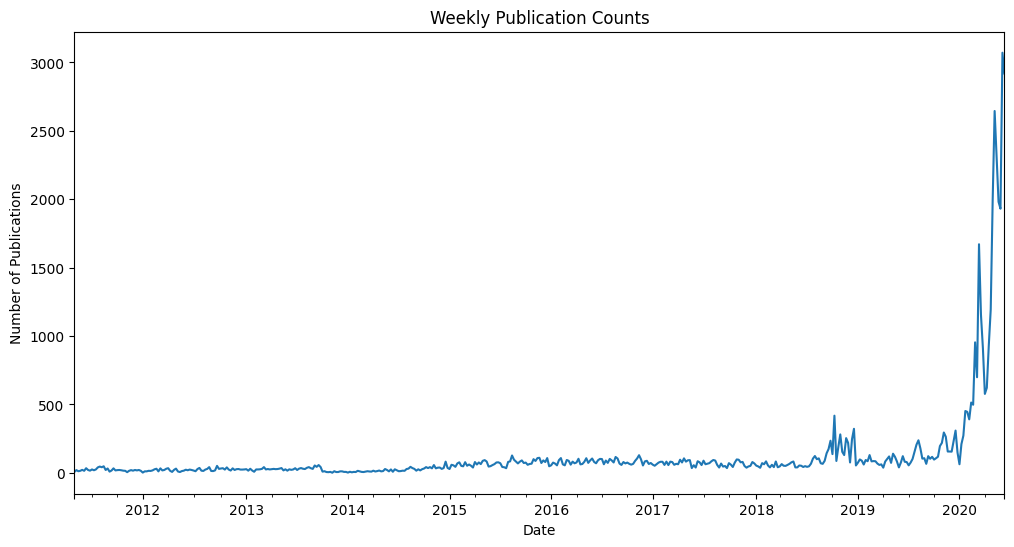

In [19]:
weekly_counts = analystRatings.resample('W', on='publication_date').size()


plt.figure(figsize=(12, 6))
weekly_counts.plot()
plt.title('Weekly Publication Counts')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.show()

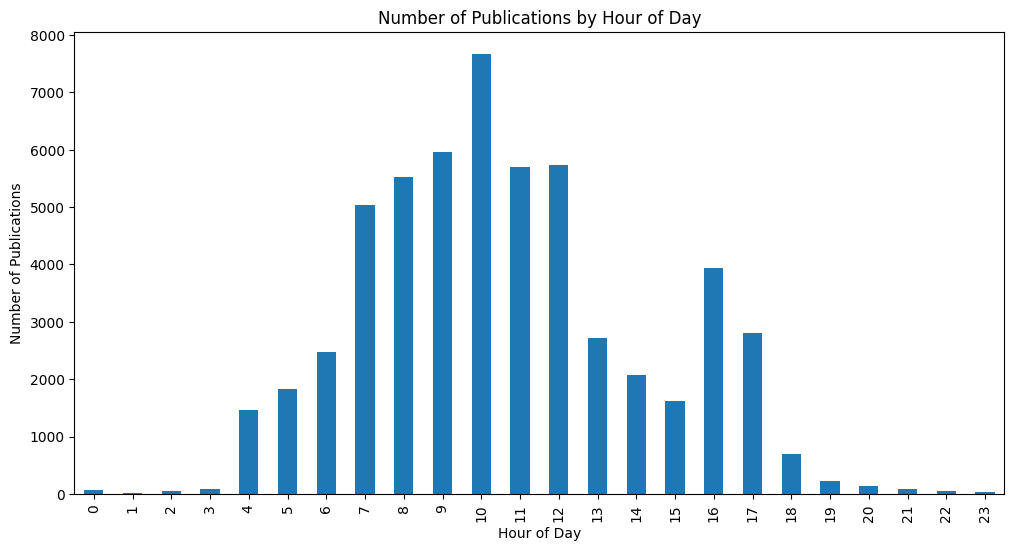

In [21]:
analystRatings['hour'] = analystRatings['publication_date'].dt.hour
hourly_counts = analystRatings['hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.title('Number of Publications by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Publications')
plt.xticks(range(24), range(24))
plt.show()

from the graph we can say that most of the publications performed at 10 we can also whow using line graphs

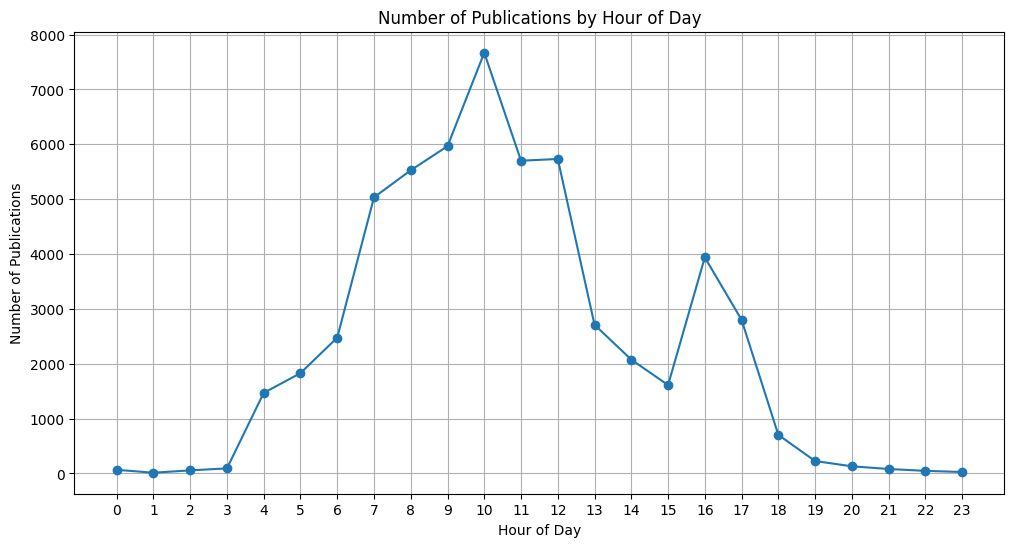

In [26]:
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='line', marker='o')
plt.title('Number of Publications by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Publications')
plt.xticks(range(24), range(24))  # Ensure all hours are labeled
plt.grid(True)
plt.show()

<ipython-input-28-6a2a08dbc5b5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')


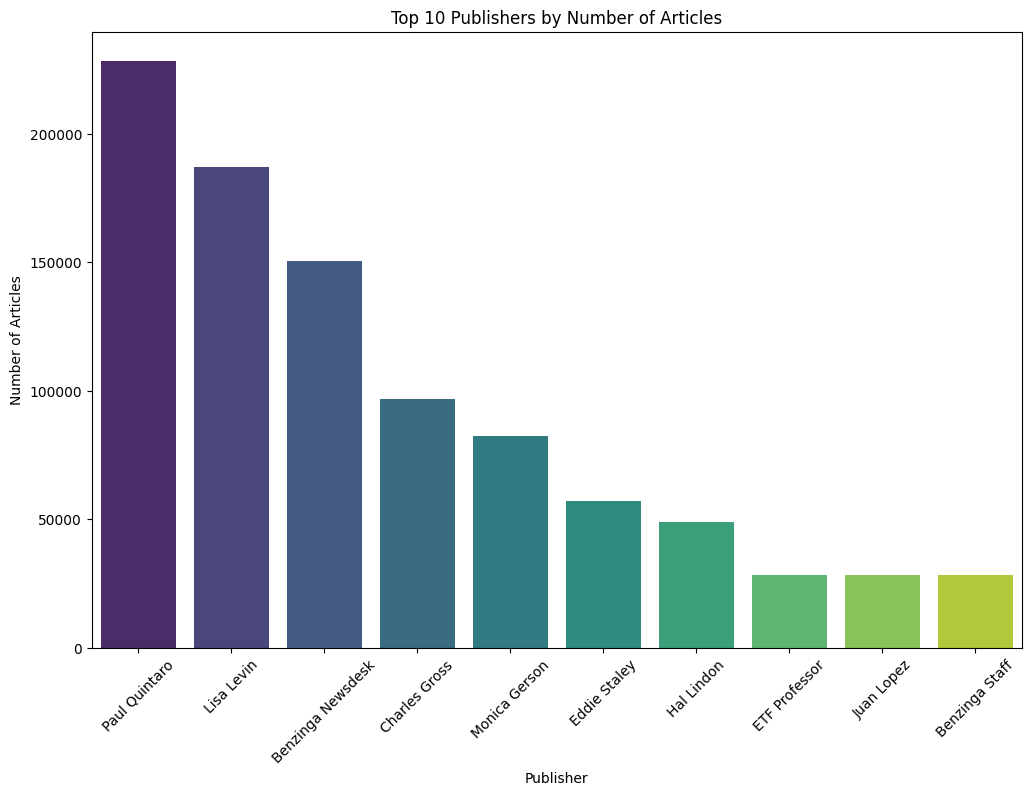

In [28]:
analystRatings['publisher'].value_counts()
top_n = 10
publisher_counts = analystRatings['publisher'].value_counts()
top_publishers = publisher_counts.head(top_n)
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')
plt.title(f'Top {top_n} Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [30]:
def extract_domain_names(email):
  return email.split('@')[-1]

analystRatings['domain'] = analystRatings['publisher'].apply(extract_domain_names)
analystRatings.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,publication_date,month,day,weekly,cleaned_headline,hour,day_of_week,domain
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020-06-05 10:30:54-04:00,6.0,5.0,Friday,stocks hit highs friday,10.0,Friday,Benzinga Insights
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020-06-03 10:45:20-04:00,6.0,3.0,Wednesday,stocks hit highs wednesday,10.0,Wednesday,Benzinga Insights
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020-05-26 04:30:07-04:00,5.0,26.0,Tuesday,71 biggest movers friday,4.0,Tuesday,Lisa Levin
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020-05-22 12:45:06-04:00,5.0,22.0,Friday,46 stocks moving friday session,12.0,Friday,Lisa Levin
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020-05-22 11:38:59-04:00,5.0,22.0,Friday,b securities maintains neutral agilent technol...,11.0,Friday,Vick Meyer


In [31]:
analystRatings['domain'].value_counts()

,count
domain,
Paul Quintaro,228373
Lisa Levin,186979
Benzinga Newsdesk,150484
Charles Gross,96732
Monica Gerson,82380
...,...
Mark Davis,1
janaviktoria,1
Kiana Danial,1
